# Test the random attacker in the little environment

-   initialisation of the environment
-   initialisation of the random agent

In [1]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.env.samples.little_network import get_little_environment_network, Dev, DSI

num_client = 5
net = get_little_environment_network(num_client)
profiles = {
    DSI(num_client): 1,
    Dev(num_client): num_client - 1
}
env = CyberBattleEnv(net, profiles)

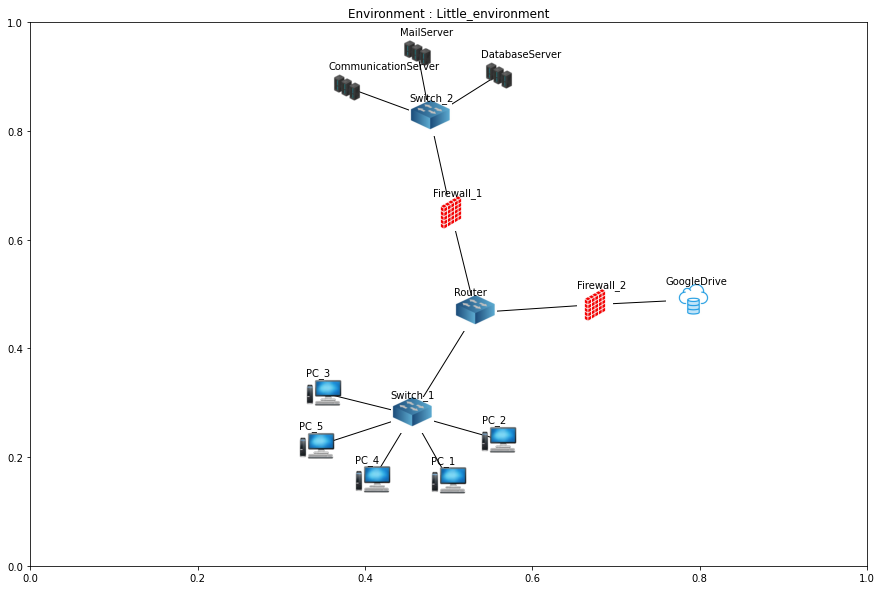

In [2]:
env.display_network()

In [3]:
env.attacker_description()

The attacker can performed the following attacks classified by their index :
{0: 'Process Discovery', 1: 'Private Keys', 2: 'Browser Session Hijacking', 3: 'Network Service Scanning', 4: 'Password Guessing'}

These attacks can be performed and allow the attacker to get outcomes as follows :
{'PC_1': {'Process Discovery': {'data sources triggered': 'Process', 'phase name': 'discovery', 'Type': 'Local'}}, 'PC_2': {}, 'PC_3': {}, 'PC_4': {}, 'PC_5': {'Private Keys': {'data sources triggered': 'File', 'phase name': 'credential-access', 'Type': 'Remote'}}, 'Switch_1': {}, 'Switch_2': {}, 'Router': {}, 'DatabaseServer': {'Browser Session Hijacking': {'data sources triggered': 'Logon Session', 'phase name': 'collection', 'Type': 'Local'}}, 'MailServer': {'Network Service Scanning': {'data sources triggered': 'Cloud Service', 'phase name': 'discovery', 'Type': 'Local'}}, 'CommunicationServer': {}, 'GoogleDrive': {'Password Guessing': {'data sources triggered': 'User Account', 'phase name': 'cr

In [4]:
from cyberbattle.agents.attacker.baseline.random import RandomAgent
from cyberbattle.agents.simulation import Simulation

random_agent = RandomAgent(name='test_random')

simulation = Simulation(env)
simulation.compile(training_method='epsilon greedy search', simulation_type='Agent vs Nothing')

Training the agent test_random
with parameters : uniform
against nothing.
Epsilon greedy search parameters : max_iteration=1000, epochs=10 and epsilon=0.9.

Epoch : 1/10, epsilon = 0.9
1000/1000 [==============================] - 5s 5ms/iteration - cumulate rewards: 5714.0 - sucessfull actions count: 20 - failed actions count: 300 - infected machines count: 3                  

Epoch ended at 321 iterations.

###################

Epoch : 2/10, epsilon = 0.010000000000000002
1000/1000 [==============================] - 16s 16ms/iteration - cumulate rewards: -1954.0 - sucessfull actions count: 44 - failed actions count: 954 - infected machines count: 3               

Epoch ended at 1000 iterations.

###################

Epoch : 3/10, epsilon = 0.01
1000/1000 [==============================] - 1s 1ms/iteration - cumulate rewards: 6602.0 - sucessfull actions count: 8 - failed actions count: 88 - infected machines count: 3                  

Epoch ended at 96 iterations.

#################

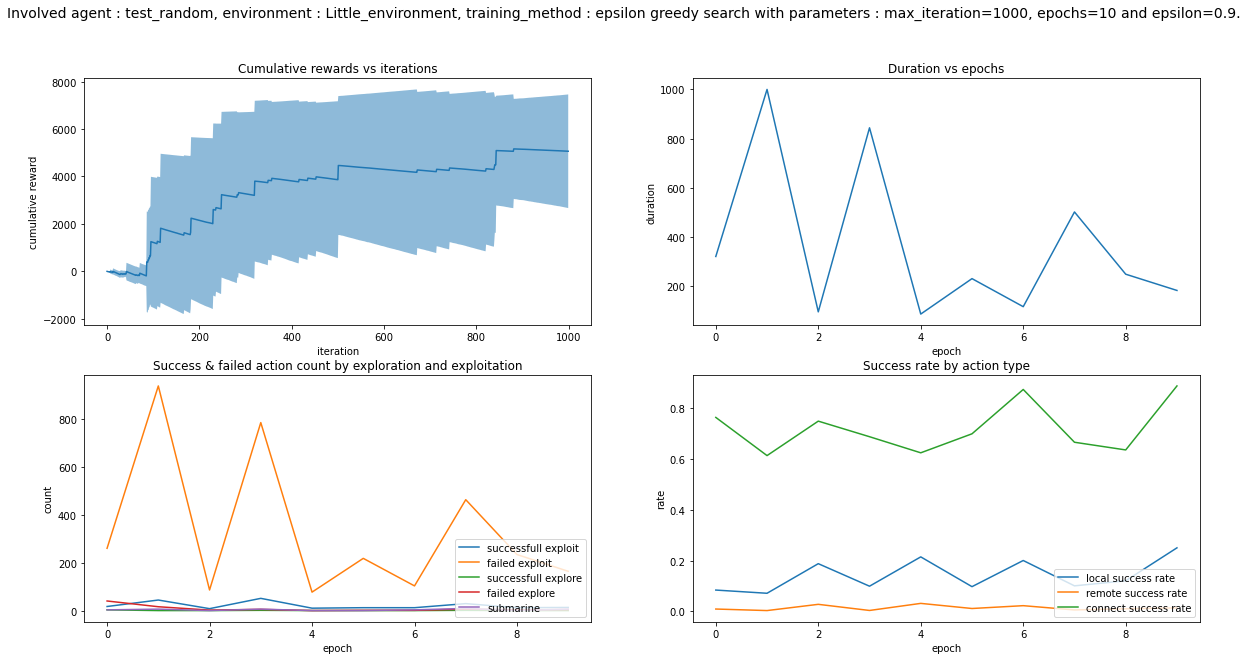

In [5]:
simulation.run(
    max_iteration=1000,
    epochs=10,
    attacker=random_agent,
    verbose=1
)